# Conversion

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

%matplotlib inline

# Grid
* NX=160, NY=269 (=43,040)
* 1grid =50m
* 8000m, 13450m
* 26246ft, 44127 ft

In [36]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


In [37]:
owc=pd.read_csv('GRIDTOP-Z6.txt', delim_whitespace=True)

In [38]:
owc.head(3)
len(owc)

43040

# gridのローテーション
* ここでは35度逆回転させて、原点に戻している操作

In [39]:
XOFFSETf=34593.5206
YOFFSETf=119478.5687
XOFFSETm=XOFFSETf/3.28084
YOFFSETm=YOFFSETf/3.28084
theta=35

# soft data
owc=owc.assign(
    x0m=np.cos(-theta/360*2*np.pi)*(owc.Xft-XOFFSETf)+np.sin(-theta/360*2*np.pi)*(owc.Yft-YOFFSETf)/3.28084,
    y0m=-np.sin(-theta/360*2*np.pi)*(owc.Xft-XOFFSETf)+np.cos(-theta/360*2*np.pi)*(owc.Yft-YOFFSETf)/3.28084,
    x0f=(np.cos(-theta/360*2*np.pi)*(owc.Xft-XOFFSETf)+np.sin(-theta/360*2*np.pi)*(owc.Yft-YOFFSETf)),
    y0f=(-np.sin(-theta/360*2*np.pi)*(owc.Xft-XOFFSETf)+np.cos(-theta/360*2*np.pi)*(owc.Yft-YOFFSETf))
)

In [40]:
owc1=owc[(owc.Z6>9026) & (owc.Z6<9034)].reset_index(drop=True)
owc1

,Xft,Yft,Z6,x0f,x0m,y0f,y0m
0,49893.28,116876.02,9033.69,14025.589798,12987.822609,6643.698386,8125.783529
1,50027.66,116781.93,9032.75,14189.635257,13114.349647,6643.701571,8179.368572
2,50162.03,116687.84,9032.37,14353.672524,13240.868495,6643.699021,8232.947878
3,50296.41,116593.75,9032.52,14517.717983,13367.395533,6643.702207,8286.532920
4,50430.78,116499.66,9033.17,14681.755250,13493.914381,6643.699657,8340.112227
5,49584.25,117292.67,9032.58,13533.466620,12661.838761,6807.745759,8052.559348
6,49718.62,117198.58,9029.93,13697.503887,12788.357608,6807.743209,8106.138655
7,49853.00,117104.49,9027.61,13861.549346,12914.884647,6807.746394,8159.723697
8,49987.37,117010.40,9026.05,14025.586613,13041.403494,6807.743844,8213.303003
9,50659.25,116539.95,9026.91,14845.797523,13674.022305,6807.748301,8481.216743


(0, 44130)

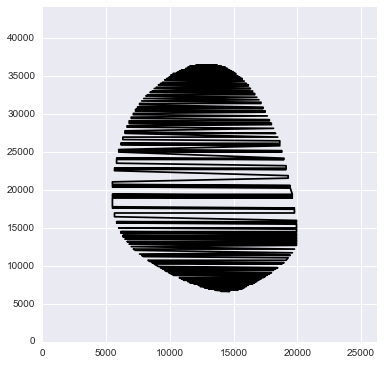

In [43]:
plt.figure(figsize=(6,6))
plt.plot(owc1.x0f, owc1.y0f, '-k', ms=2)
plt.xlim(0,26250)
plt.ylim(0,44130)

(0, 44130)

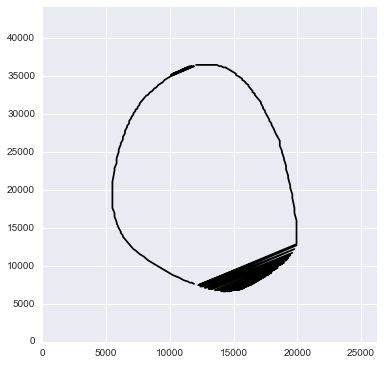

In [62]:
owc_left=owc1[owc1.x0f<12000].reset_index(drop=True)
owc_left=owc_left.sort_values(by='Yft')
owc_left.to_csv(r'owc_left.txt', index=False)

owc_right=owc1[owc1.x0f>12000].reset_index(drop=True)
owc_right=owc_right.sort_values(by='Yft', ascending=False)
owc_right.to_csv(r'owc_right.txt', index=False)

plt.figure(figsize=(6,6))
plt.plot(owc_right.x0f, owc_right.y0f, '-k', ms=2)
plt.plot(owc_left.x0f, owc_left.y0f, '-k', ms=2)
plt.xlim(0,26250)
plt.ylim(0,44130)

In [66]:
owc1=pd.read_csv('GRIDTOP-Z6-ORI.txt', delim_whitespace=True)

(0, 44130)

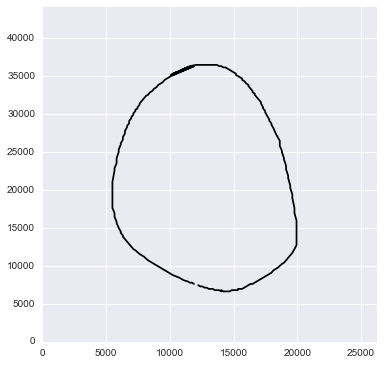

In [68]:
plt.figure(figsize=(6,6))
plt.plot(owc1.x0f, owc1.y0f, '-k', ms=2)
plt.xlim(0,26250)
plt.ylim(0,44130)